# Dataset de Nivel de Obesidad

El dataset **“Estimation of Obesity Levels Based on Eating Habits and Physical Condition”** reúne información de 2.111 individuos de México, Perú y Colombia. El objetivo es predecir el **nivel de obesidad** de cada persona a partir de hábitos alimenticios, características físicas y estilo de vida.

El conjunto contiene **17 atributos** (16 predictivos y 1 variable objetivo) que abarcan aspectos relacionados con la edad, el peso, la estatura, los antecedentes familiares, el consumo de ciertos alimentos y bebidas, el uso de tecnología, la actividad física y los medios de transporte. El nivel de obesidad está clasificado en siete
categorías, que van desde “peso insuficiente” hasta “obesidad tipo III”.

|          **Atributo**          |                                                                  **Descripción**                                                                   |
|:------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------:|
|             Gender             |                                                         Género del individuo (Male/Female)                                                         |
|              Age               |                                                                    Edad en años                                                                    |
|             Height             |                                                                  Altura en metros                                                                  |
|             Weight             |                                                                 Peso en kilogramos                                                                 |
| family_history_with_overweight |                                                   Si tiene antecedentes familiares de sobrepeso                                                    |
|              FAVC              |                                           Frecuencia de consumo de alimentos con alto contenido calórico                                           |
|              FCVC              |                                                     Frecuencia de consumo de vegetales (1 a 3)                                                     |
|              NCP               |                                                        Número de comidas principales al día                                                        |
|              CAEC              |                                       Consumo de alimentos entre comidas (no, Sometimes, Frequently, Always)                                       |
|             SMOKE              |                                                                    Si fuma o no                                                                    |
|              CH2O              |                                                          Consumo de agua diario en litros                                                          |
|              SCC               |                                                         Si controla el consumo de calorías                                                         |
|              FAF               |                                                   Frecuencia de actividad física (horas/semana)                                                    |
|              TUE               |                                               Tiempo de uso de dispositivos electrónicos (horas/día)                                               |
|              CALC              |                                                Consumo de alcohol (no,Sometimes,Frequently,Always)                                                 |
|             MTRANS             |                              Medio de transporte principal (Automobile,Bike,Motorbike,Public_Transportation,Walking)                               |
|       NObesity (Target)        | Nivel de obesidad (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III) |

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "./datos/"

data = pd.read_csv(DATA_DIR + "obesity_uci.csv")

## Ejercicio 1

Complete la tabla indicando cuántos atributos corresponden a cada del dataset de obesidad.

| **Tipo de atributo** | **Cantidad** |                       **Cuales**                       |
|:---------------------|:-------------|:------------------------------------------------------:|
| Discreto (numérico)  | 2            |                        Age,NCP                         |
| Continuo (numérico)  | 5            |               Height,Weight,CH20,FAF,TUE               |
| Nominal (categórico) | 5            | Gender,family_history_with_overweight,SCC,SMOKE,MTRANS |
| Ordinal (categórico) | 5            |              FAVC,FCVC,CAEC,CALC,NObesity              |

## Ejercicio 2  

Proponga una tarea de clasificación y una tarea de regresión que puedan realizarse a partir de los datos del dataset de obesidad.

- **Tarea de clasificacion** -> Prediccion del nivel de obesidad (NObesity).
- **Tarea de regresion** -> Prediccion del peso (weight).

## Ejercicio 3

Indique qué tipo de información brindan las siguientes representaciones gráficas:

1) Diagrama de Barras
2) Histograma
3) Diagrama de caja
4) Diagrama de dispersión

Luego, genere al menos un ejemplo de cada representación usando el dataset de obesidad y explique
cómo interpretar cada uno.

### 1. Diagrama de barras

Se usa para representar datos de variables cualitativas o discreatas. La barra representa la frecuencia absoluta o relativa de la categoria.

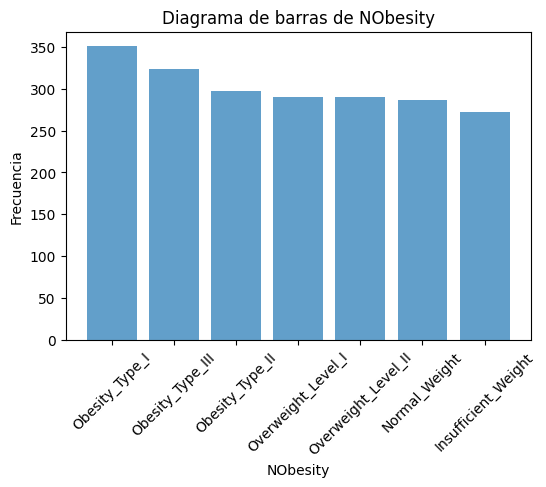

In [5]:
barras = data['NObesity'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(barras.index, barras.values, align='center', alpha=0.7)
plt.xlabel('NObesity')
plt.ylabel('Frecuencia')
plt.title('Diagrama de barras de NObesity')
## evitar superposicion de etiquetas
plt.xticks(rotation=45)
plt.show()

### 2. Histograma

Representa la distribucion de un conjunto de datos. Utilizado para visualizar la frecuencia de ocurrencia de diferentes intervalos o categorias en un conjunto de datos continuo.

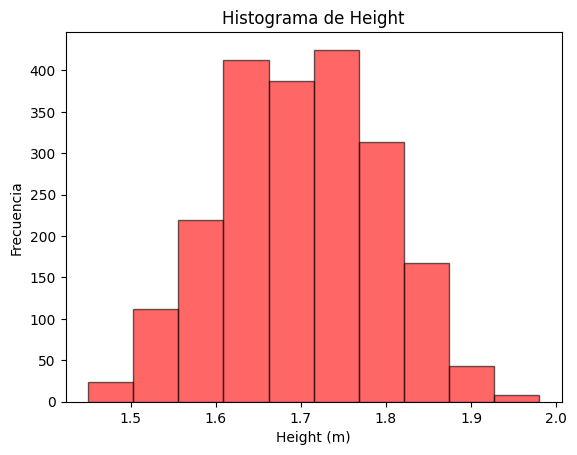

In [12]:
plt.figure()
# histograma con altura
plt.hist(data['Height'], bins=10, alpha=0.6, color='red', edgecolor='black')
plt.ylabel('Frecuencia')
plt.xlabel('Height (m)')
plt.title('Histograma de Height')
plt.show()

### 3. Diagrama de caja

Representacion grafica de una muestra para mostrar sus caracteristicas principales y señalar los posibles datos atipicos.

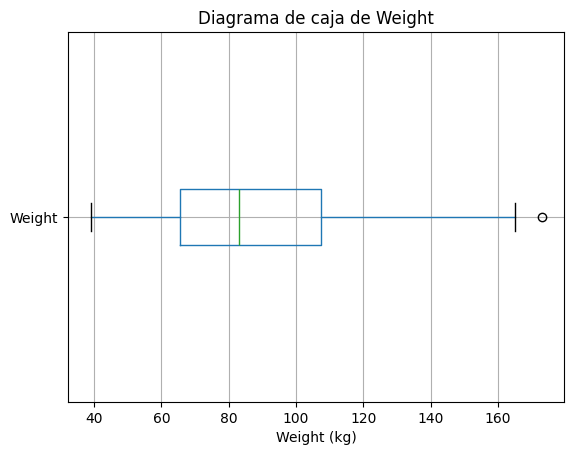

In [17]:
plt.figure()
data.boxplot(column=['Weight'], vert=False)
plt.title('Diagrama de caja de Weight')
plt.xlabel('Weight (kg)')
plt.show()

### 4. Diagrama de dispersion

Grafica los valores de dos varibales (x, y). Si estan correlacionadas, el grafico muestra algun nivel de correlacion, sino, hay una nube de puntos dispersos en el grafico.

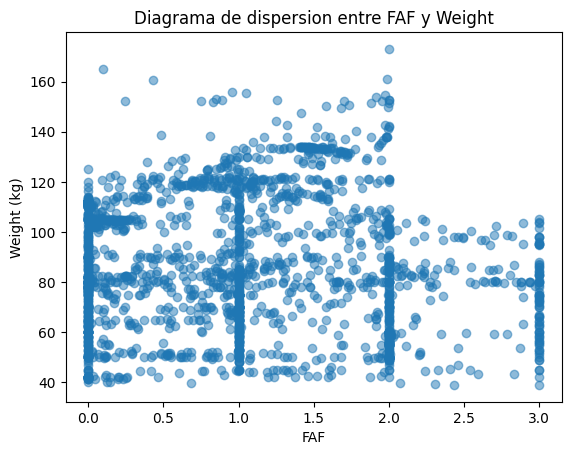

In [19]:
plt.figure()
plt.scatter(data['FAF'], data['Weight'], alpha=0.5)
plt.xlabel('FAF')
plt.ylabel('Weight (kg)')
plt.title('Diagrama de dispersion entre FAF y Weight')
plt.show()

## Ejercicio 4

Complete el siguiente cuadro y dibuje el diagrama de caja del atributo "**weight**".

|               **Medida**                |            **Valor**             |
|:---------------------------------------:|:--------------------------------:|
|                 Mínimo                  |               39.0               |
|                 Máximo                  |              173.0               |
|                   Q1                    |              65.47               |
|              Q2 o mediana               |                83                |
|                   Q3                    |              107.43              |
|                   RIC                   |              41.95               |
|             Bigote superior             |              170.36              |
|             Bigote inferior             |               2.53               |
|  Intervalos de valores atípicos leves   | (-60.39, 2.53) U (170.36, 233.3) |
|         Valores atipicos leves          |               173                |
| Intervalos de valores atípicos extremos |    (-∞, -60.39) U (233.3, +∞)    |
|        Valores atípicos extremos        |                                  |

In [38]:
Q = data['Weight'].quantile([0.25, 0.5, 0.75]).values
print(f"Q1: {Q[0]}, Q2: {Q[1]}, Q3: {Q[2]}")
RIC = Q[2] - Q[0]
print(f"RIC: {RIC}")
print(f"Minimo: {data['Weight'].min()}")
print(f"Maximo: {data['Weight'].max()}")
print(f"Bigote inferior: {Q[0] - 1.5 * RIC}")
print(f"Bigote superior: {Q[2] + 1.5 * RIC}")
print(f"Intervalo de valores atipicos leves: ({Q.min() - 3 * RIC}, {Q.min() - 1.5 * RIC}) U ({Q.max() + 1.5 * RIC}, {Q.max() + 3 * RIC})")
print(f"Intervalo de valores atipicos extremos: ( -inf, {Q.min() - 3 * RIC}) U ({Q.max() + 3 * RIC}, +inf)")
print(f"Valores atipicos leves:\n{data[(data['Weight'] < (Q[0] - 1.5 * RIC)) | (data['Weight'] > (Q[2] + 1.5 * RIC))]['Weight'].values}")
print(f"Valores atipicos extremos:\n{data[(data['Weight'] < (Q[0] - 3 * RIC)) | (data['Weight'] > (Q[2] + 3 * RIC))]['Weight'].values}")

Q1: 65.473343, Q2: 83.0, Q3: 107.430682
RIC: 41.957339000000005
Minimo: 39.0
Maximo: 173.0
Bigote inferior: 2.537334499999993
Bigote superior: 170.3666905
Intervalo de valores atipicos leves: (-60.398674000000014, 2.537334499999993) U (170.3666905, 233.30269900000002)
Intervalo de valores atipicos extremos: ( -inf, -60.398674000000014) U (233.30269900000002, +inf)
Valores atipicos leves:
[173.]
Valores atipicos extremos:
[]


## Ejercicio 5

Los valores del atributo peso (“weight”) fueron agrupados según el atributo de antecedente de obesidad familiar (“family_history_with_overweight”). La figura muestra los diagramas de caja correspondientes. 

<img src="./assets/5.png" width="900">

Complete el siguiente cuadro y responda verdadero o falso justificando cada afirmación según los valores obtenidos:

|   **Medida**    | **yes** | **no** |
|:---------------:|:-------:|:------:|
|     Mínimo      |   39    |  39.1  |
|     Máximo      |   173   |  115   |
|       Q1        |  75.85  | 49.03  |
|       Q2        |  89.98  |   56   |
|       Q3        | 111.83  |  69.5  |
|       RIC       |  35.98  | 20.46  |
| Bigote Inferior |  21.86  | 18.34  |
| Bigote Superior | 165.82  | 100.19 |

**a)** Al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg.
	
 - **RTA: Verdadero**. Por ser Q3 mayor a 100 kg, nos indica que el 25% de las personas con antecendentes tienen más 111.8390105 kg, por lo tanto, existirá al menos una cuarta parte con más de 100kg.

**b)** Es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg.

 - **RTA: Verdadero**. 115kg supera el bigote superior que es de 100.190309.

**c)** La mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg.

 - **RTA: Verdadero**. Q2 < 60 kg.

**d)** Todos los valores atípicos para personas con antecedentes familiares de obesidad son leves.

  - **RTA: Verdadero**. No hay una persona que pese más de Q3 + 3*RIC =  111.8390105 + 3*35.9877915 = 219.802385

In [54]:
print("---CON antecedentes familiares---")
data_with_family_history = data[data['family_history_with_overweight'] == 'yes']
min_with_family_history = data_with_family_history['Weight'].min()
max_with_family_history = data_with_family_history['Weight'].max()
Q_with_family_history = data_with_family_history['Weight'].quantile([0.25, 0.5, 0.75]).values
print(f"Minimo: {min_with_family_history}")
print(f"Maximo: {max_with_family_history}")
print(f"Q1: {Q_with_family_history[0]}, Q2: {Q_with_family_history[1]}, Q3: {Q_with_family_history[2]}")
RIC_with_family_history = Q_with_family_history[2] - Q_with_family_history[0]
print(f"RIC: {RIC_with_family_history}")
print(f"Bigote inferior (LI): {Q_with_family_history.min() - 1.5 * RIC_with_family_history}")
print(f"Bigote superior (LS): {Q_with_family_history.max() + 1.5 * RIC_with_family_history}")
print("\n")

data_without_family_history = data[data['family_history_with_overweight'] == 'no']
print("---SIN antecedentes familiares---")
min_without_family_history = data_without_family_history['Weight'].min()
max_without_family_history = data_without_family_history['Weight'].max()
Q_without_family_history = data_without_family_history['Weight'].quantile([0.25, 0.5, 0.75]).values
print(f"Minimo: {min_without_family_history}")
print(f"Maximo: {max_without_family_history}")
print(f"Q1: {Q_without_family_history[0]}, Q2: {Q_without_family_history[1]}, Q3: {Q_without_family_history[2]}")
RIC_without_family_history = Q_without_family_history[2] - Q_without_family_history[0]
print(f"RIC: {RIC_without_family_history}")
print(f"Bigote inferior (LI): {Q_without_family_history.min() - 1.5 * RIC_without_family_history}")
print(f"Bigote superior (LS): {Q_without_family_history.max() + 1.5 * RIC_without_family_history}")

---CON antecedentes familiares---
Minimo: 39.0
Maximo: 173.0
Q1: 75.851219, Q2: 89.98667549999999, Q3: 111.8390105
RIC: 35.9877915
Bigote inferior (LI): 21.86953175
Bigote superior (LS): 165.82069775


---SIN antecedentes familiares---
Minimo: 39.101805
Maximo: 115.0
Q1: 49.039794, Q2: 56.0, Q3: 69.5
RIC: 20.460206
Bigote inferior (LI): 18.349485
Bigote superior (LS): 100.190309


## Ejercicio 6

Discretice el atributo del consumo de agua diario en litros (“CH2O”) en tres intervalos: Bajo, Medio y Alto.
Indique en la tabla los intervalos utilizados y la cantidad respectivas de ejemplos de cada uno al discretizar por rango y por intervalo. Luego, explique porque los ejemplos no quedaron divididos en intervalos con la misma cantidad de valores.

<table border="1" cellspacing="0" cellpadding="5" style="margin: auto; border: 1px solid black;">
    <thead>
        <tr>
            <th rowspan="2"></th>
            <th colspan="3">Rango</th>
            <th colspan="3">Intervalo</th>
        </tr>
        <tr>
            <th>Bajo</th>
            <th>Medio</th>
            <th>Alto</th>
            <th>Bajo</th>
            <th>Medio</th>
            <th>Alto</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Intervalos</td>
            <td>(0.998, 1.667]</td>
            <td>(1.667, 2.333]</td>
            <td>(2.333, 3.0]</td>
            <td>(0.999, 1.92]</td>
            <td>(1.92, 2.185]</td>
            <td>(2.185, 3.0]</td>
        </tr>
        <tr>
            <td>Cantidad de Valores</td>
            <td>576</td>
            <td>910</td>
            <td>625</td>
            <td>704</td>
            <td>703</td>
            <td>704</td>
        </tr>
    </tbody>
</table>

In [75]:
etiq = ["bajo", "medio", "alto"]
## Por Rango
column = pd.cut(data['CH2O'], bins=len(etiq), labels=etiq)
data["CH2O_range"] = pd.Series.to_frame(column)
print(pd.Series(data["CH2O_range"]).value_counts())
print("intervalos = ", pd.cut(data["CH2O"], bins=len(etiq)).unique())

## Por intervalo
column = pd.qcut(data['CH2O'], q=len(etiq), labels=etiq)
data["CH2O_interval"] = pd.Series.to_frame(column)
print(pd.Series(data["CH2O_interval"]).value_counts())
print("intervalos = ", pd.qcut(data["CH2O"], q=len(etiq)).unique())

CH2O_range
medio    910
alto     625
bajo     576
Name: count, dtype: int64
intervalos =  [(1.667, 2.333], (2.333, 3.0], (0.998, 1.667]]
Categories (3, interval[float64, right]): [(0.998, 1.667] < (1.667, 2.333] < (2.333, 3.0]]
CH2O_interval
bajo     704
alto     704
medio    703
Name: count, dtype: int64
intervalos =  [(1.92, 2.185], (2.185, 3.0], (0.999, 1.92]]
Categories (3, interval[float64, right]): [(0.999, 1.92] < (1.92, 2.185] < (2.185, 3.0]]
